# Isolate TRI facilities with greater risk of contaminating water sources

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

import warnings
warnings.simplefilter(action='ignore')

In [3]:
tri_in = gpd.read_file('data/TRI-facilities.geojson')

In [5]:
tri = tri_in.copy()

In [6]:
tri_land = tri.sort_values(by=['LAND_RELEASE_EXCLUDED_LBS'], ascending=False).head(100)
tri_land.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,...,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
21553,99752RDDGP90MIL,2018,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,,,...,0.86,4.908927e+08,3.85,452.06,2277576.0,2277576.0,2278031.91,0.02,2278031.93,POINT (-162.85549 68.06151)
19008,84006KNNCT12300,2018,KENNECOTT UTAH COPPER MINE CONCENTRATORS & POW...,8362 WEST 10200 SOUTH,BINGHAM CANYON,SALT LAKE,UT,84006,,,...,0.00,1.790986e+08,476.00,83.64,12924.0,12924.0,13483.64,0.00,13483.64,POINT (-112.15000 40.51667)
19611,89414NWMNT35MIL,2018,NEWMONT GOLDCORP TWIN CREEKS MINE,35 MILES NE OF GOLCONDA,GOLCONDA,HUMBOLDT,NV,89414,,,...,225.20,5.658834e+06,163.00,19.00,590172.0,590172.0,590354.00,0.00,590354.00,POINT (-117.16764 41.25349)
19395,85539BHPCPHWY60,2018,PINTO VALLEY MINE,2911 N FOREST SERVICE RD 287,MIAMI,GILA,AZ,85539,,,...,154.00,1.016332e+07,0.00,7398.00,0.0,0.0,7398.00,0.00,7398.00,POINT (-110.98421 33.41745)
21555,99801KNNCT13401,2018,HECLA GREENS CREEK MINING CO,13401 GLACIER HWY,JUNEAU,JUNEAU BOROUGH,AK,99801,,,...,0.00,7.031817e+06,1.00,0.00,0.0,0.0,1.00,0.00,1.00,POINT (-134.64121 58.08180)


<function print>

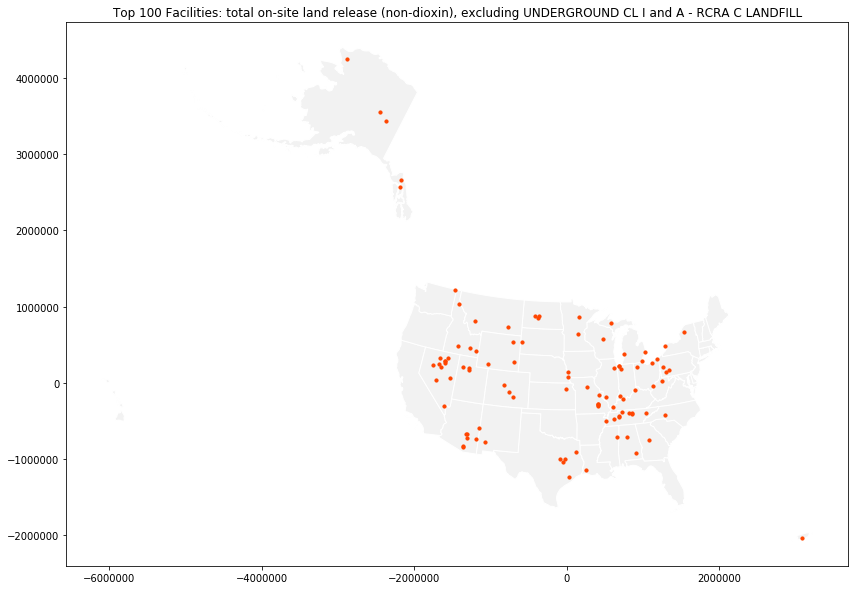

In [10]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_land_equal = tri_land.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_land_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: total on-site land release (non-dioxin), excluding UNDERGROUND CL I and A - RCRA C LANDFILL');

print

In [17]:
tri_uncontained_land_release = tri[tri['LAND_RELEASE_EXCLUDED_LBS'] > 0]
tri_uncontained_land_release

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,...,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
45,00705TRCSNRD14K,2018,TO-RICOS LTD,RD 14 KM 48 BO ASOMANTE,AIBONITO,AIBONITO,PR,705,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-66.28087 18.12953)
58,0073WLLDWSBARAM,2018,ALLIED WASTE OF PONCE,BARAMAYA AVENUE - PR 500 - COTORRA WARD,PONCE,PONCE,PR,732,,,...,NaN,NaN,0.00,0.0000,3.990680e+06,3.990680e+06,3.990680e+06,0.00,3.990680e+06,POINT (-66.64132 18.00226)
62,00751SRMYNRAD1I,2018,US ARMY NATIONAL GUARD CAMP SANTIAGO TRAINING ...,ROAD # 1 INT ROAD #154,SALINAS,SALINAS,PR,751,,,...,0.00,3.775900e+03,0.00,0.0000,3.775900e+03,3.775900e+03,3.775900e+03,0.00,3.775900e+03,POINT (-66.29690 18.01200)
70,00771BDLSPPBX27,2018,ASPEN SURGICAL PR CORP,ROAD 183 KM 20.3,LAS PIEDRAS,LAS PIEDRAS,PR,771,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-65.87420 18.17800)
84,0080WHVYMT7865E,2018,HEAVY MATERIALS SVI - ST THOMAS,7865 ESTATE MARIENDAHL #1,ST THOMAS,ST THOMAS,VI,802,,,...,0.00,1.478440e+01,0.00,0.9138,1.387060e+01,1.387060e+01,1.478440e+01,0.00,1.478440e+01,POINT (-64.88187 18.32596)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,99743HLYPW25MIL,2018,GOLDEN VALLEY ELECTRIC ASSOC HEALY POWER PLANT,25 HEALY SPUR RD,HEALY,DENALI,AK,99743,,,...,1455.40,1.580570e+03,0.00,4.1000,0.000000e+00,0.000000e+00,4.100000e+00,0.00,4.100000e+00,POINT (-148.94852 63.85554)
21552,9974WSBLLC1RIVE,2018,USIBELLI COAL MINE INC,100 RIVER ROAD,HEALY,DENALI,AK,99743,,,...,0.00,3.026000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-148.68056 63.91775)
21553,99752RDDGP90MIL,2018,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,,,...,0.86,4.908927e+08,3.85,452.0600,2.277576e+06,2.277576e+06,2.278032e+06,0.02,2.278032e+06,POINT (-162.85549 68.06151)
21554,99801CRLSK331CL,2018,COEUR ALASKA INC KENSINGTON GOLD PROJECT,3031 CLINTON DR,JUNEAU,JUNEAU BOROUGH,AK,99801,,,...,3.00,5.786200e+03,0.00,23.0000,4.200000e+03,4.200000e+03,4.223000e+03,45.10,4.268100e+03,POINT (-135.10476 58.86749)


In [20]:
tri_uncontained_land_release.to_file('data/tri_uncontained_land_release.geojson', driver='GeoJSON')